## Домашнее задание
### Задача: определить регион США, в которой находится квартира.

### Описание датасета:
Датасет содержит информацию о съёмных квартирах в США.

Признаки, содержащиеся в датасете:

* ID квартиры в датасете
* URL квартиры на сайте для аренды
* Регион квартиры
* URL региона квартиры
* Арендная плата за месяц
* Тип застройки
* Площадь квартиры
* Количество кроватей
* Количество ванных комнат
* Разрешение на котов
* Разрешение на собак
* Разрешение на курение
* Доступ для инвалидных колясок
* Доступ к зарядным устройствам для электромобилей
* Наличие мобели
* Доступные варианты стирки
* Доступные варианты парковки
* URL изображения
* Описание
* Широта
* Долгота
* Штат

In [2]:
import sklearn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

1. Чтение данных

In [3]:
url = "housing.csv"
data_raw = pd.read_csv(url)

In [4]:
data_raw["state"].unique()

array(['ca', 'co', 'ct', 'dc', 'fl', 'de', 'ga', 'hi', 'id', 'il', 'in',
       'ia', 'ks', 'ky', 'la', 'me', 'mi', 'md', 'ma', 'mn', 'ms', 'nc',
       'mo', 'mt', 'ne', 'nv', 'nj', 'nm', 'ny', 'nh', 'oh', 'nd', 'ok',
       'or', 'pa', 'ri', 'sc', 'tn', 'sd', 'tx', 'ut', 'va', 'vt', 'wa',
       'wv', 'wi', 'wy', 'al', 'az', 'ak', 'ar'], dtype=object)

In [5]:
states = {
        'ak': 'o',
        'al': 's',
        'ar': 's',
        'as': 'o',
        'az': 'w',
        'ca': 'w',
        'co': 'w',
        'ct': 'n',
        'dc': 'n',
        'de': 'n',
        'fl': 's',
        'ga': 's',
        'gu': 'o',
        'hi': 'o',
        'ia': 'm',
        'id': 'w',
        'il': 'm',
        'in': 'm',
        'ks': 'm',
        'ky': 's',
        'la': 's',
        'ma': 'n',
        'md': 'n',
        'me': 'n',
        'mi': 'w',
        'mn': 'm',
        'mo': 'm',
        'mp': 'o',
        'ms': 's',
        'mt': 'w',
        'na': 'o',
        'nc': 's',
        'nd': 'm',
        'ne': 'w',
        'nh': 'n',
        'nj': 'n',
        'nm': 'w',
        'nv': 'w',
        'ny': 'n',
        'oh': 'm',
        'ok': 's',
        'or': 'w',
        'pa': 'n',
        'pr': 'o',
        'ri': 'n',
        'sc': 's',
        'sd': 'm',
        'tn': 's',
        'tx': 's',
        'ut': 'w',
        'va': 's',
        'vi': 'o',
        'vt': 'n',
        'wa': 'w',
        'wi': 'm',
        'wv': 's',
        'wy': 'w'
}

In [6]:
data_raw['reg'] = data_raw.apply(
    lambda row: states.get(row.state), axis = 1)
data_raw['reg']

0         w
1         w
2         w
3         w
4         w
         ..
384972    w
384973    w
384974    w
384975    w
384976    w
Name: reg, Length: 384977, dtype: object

In [7]:
subset = np.random.choice(np.arange(data_raw.shape[0]), size=200000, replace=False)

In [8]:
data_raw = data_raw.iloc[subset]

In [9]:
data_raw.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,reg
243286,7049427287,https://eugene.craigslist.org/apa/d/eugene-pla...,eugene,https://eugene.craigslist.org,0,apartment,864,2,1.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00B0B_iOt9v048p5...,"Valley River Court is a great community, with ...",44.0891,-123.1060,or,w
263110,7042055352,https://charleston.craigslist.org/apa/d/charle...,charleston,https://charleston.craigslist.org,1400,condo,1140,2,2.0,1,...,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00M0M_6hq5hpadCU...,Spacious Condo!!! Move in this weekend! 2bdrm/...,32.7508,-79.9660,sc,s
255956,7048573260,https://pittsburgh.craigslist.org/apa/d/pittsb...,pittsburgh,https://pittsburgh.craigslist.org,750,apartment,658,2,1.0,1,...,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00505_djz9FwRrUq...,The Alden South Hills Apartment Homes 5492 You...,40.3407,-79.9809,pa,n
383494,7036159725,https://palmsprings.craigslist.org/apa/d/palm-...,palm springs,https://palmsprings.craigslist.org,1485,apartment,710,1,1.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/01212_gX59noHASG...,Call Now - show contact info x 107OR Text 10...,33.8426,-116.5430,ca,w
322515,7048447222,https://danville.craigslist.org/apa/d/fieldale...,danville,https://danville.craigslist.org,450,apartment,800,2,1.0,0,...,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00A0A_hvVgYzkM5T...,2BR / 1Ba available now no smoking off-stre...,36.6997,-79.9260,va,s


In [10]:
data_raw.tail()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,reg
255477,7050824719,https://pittsburgh.craigslist.org/apa/d/mckees...,pittsburgh,https://pittsburgh.craigslist.org,580,apartment,675,1,1.0,0,...,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00I0I_52W2f3O34S...,You will love this OVER-SIZED one bedroom apar...,40.3478,-79.8642,pa,n
13542,7045160181,https://ventura.craigslist.org/apa/d/camarillo...,ventura county,https://ventura.craigslist.org,2355,apartment,932,2,2.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00M0M_jOil1FSSX3...,We believe elevating where you live is about b...,34.2306,-119.0000,ca,w
147620,7050895672,https://detroit.craigslist.org/wyn/apa/d/winds...,detroit metro,https://detroit.craigslist.org,1805,apartment,1350,2,3.0,1,...,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00A0A_3dEE36FDZ9...,Are you looking for the perfect apartment home...,42.3242,-83.0564,mi,w
16940,7041516482,https://boulder.craigslist.org/apa/d/lafayette...,boulder,https://boulder.craigslist.org,1660,apartment,1040,2,2.0,1,...,0,0,w/d in unit,NaN,https://images.craigslist.org/01212_dVNOhx7MKg...,The Ultimate Living Space CALL: show contact...,39.9754,-105.0870,co,w
206847,7040377390,https://lascruces.craigslist.org/apa/d/las-cru...,las cruces,https://lascruces.craigslist.org,515,apartment,560,1,1.0,1,...,0,0,no laundry on site,NaN,https://images.craigslist.org/00T0T_aq5LeuQ2NB...,CUTE ONE BED ONE BATH APARTMENT IN 4 PLEX CLOS...,32.3050,-106.7820,nm,w


In [11]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 243286 to 206847
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       200000 non-null  int64  
 1   url                      200000 non-null  object 
 2   region                   200000 non-null  object 
 3   region_url               200000 non-null  object 
 4   price                    200000 non-null  int64  
 5   type                     200000 non-null  object 
 6   sqfeet                   200000 non-null  int64  
 7   beds                     200000 non-null  int64  
 8   baths                    200000 non-null  float64
 9   cats_allowed             200000 non-null  int64  
 10  dogs_allowed             200000 non-null  int64  
 11  smoking_allowed          200000 non-null  int64  
 12  wheelchair_access        200000 non-null  int64  
 13  electric_vehicle_charge  200000 non-null  int64  
 14 

2. Визуализация данных

In [12]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)

In [13]:
# sns.pairplot(data_raw.iloc[random_subset], hue='type', diag_kind='hist')
# plt.legend()
# pass

In [14]:
corr_mat = data_raw.corr()
corr_mat

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
id,1.000000,0.000609,-0.006980,-0.015833,-0.034728,0.043931,0.035330,0.016010,0.004967,0.018395,-0.028798,-0.000675,-0.081998
price,0.000609,1.000000,0.000316,0.001311,0.010007,-0.001756,-0.002835,-0.000952,0.007000,0.000581,0.002126,-0.002313,-0.000701
sqfeet,-0.006980,0.000316,1.000000,0.002506,0.007434,-0.003139,-0.002306,-0.002852,-0.001256,-0.000169,0.001440,0.008868,-0.005216
beds,-0.015833,0.001311,0.002506,1.000000,0.483926,-0.018731,-0.010676,0.001180,-0.009513,-0.003387,0.001506,0.006466,0.006977
baths,-0.034728,0.010007,0.007434,0.483926,1.000000,-0.018265,0.018586,-0.014280,0.019201,0.010856,0.036937,-0.074656,-0.002554
cats_allowed,0.043931,-0.001756,-0.003139,-0.018731,-0.018265,1.000000,0.886461,0.017362,0.121075,0.049898,-0.059195,-0.015399,0.035165
dogs_allowed,0.035330,-0.002835,-0.002306,-0.010676,0.018586,0.886461,1.000000,0.013616,0.128810,0.049695,-0.037601,-0.056745,0.019164
smoking_allowed,0.016010,-0.000952,-0.002852,0.001180,-0.014280,0.017362,0.013616,1.000000,-0.224721,-0.096372,-0.160264,-0.176579,0.160140
wheelchair_access,0.004967,0.007000,-0.001256,-0.009513,0.019201,0.121075,0.128810,-0.224721,1.000000,0.191306,0.193705,0.000613,-0.023988
electric_vehicle_charge,0.018395,0.000581,-0.000169,-0.003387,0.010856,0.049898,0.049695,-0.096372,0.191306,1.000000,0.070175,0.026732,-0.060704


<AxesSubplot:>

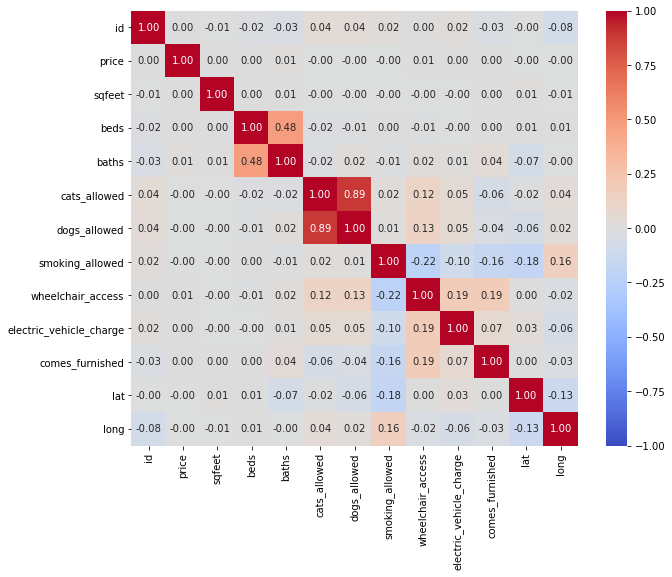

In [15]:
plt.figure(figsize = (10,8))
sns.heatmap(data_raw.corr(),annot=True,fmt='.2f',vmin=-1, vmax=1,cmap="coolwarm")

Разрешение на собак и разрешение на котов сильно коррелируют.

<AxesSubplot:xlabel='reg', ylabel='count'>

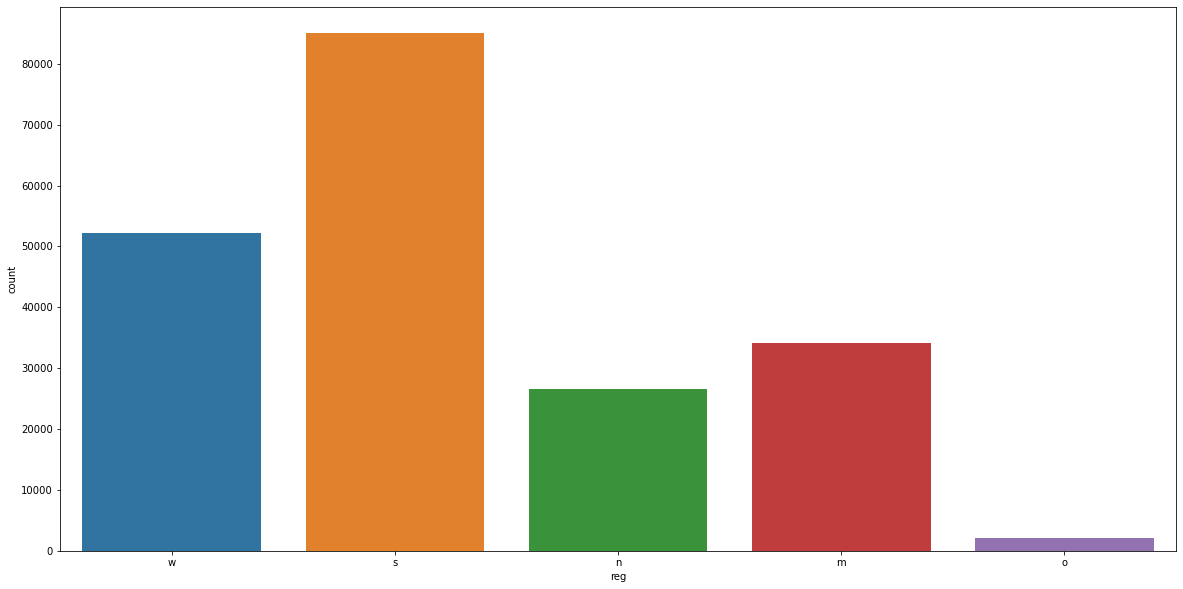

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x='reg',data = data_raw)

3. Обработка данных

In [17]:
data_raw.isna().sum()

id                             0
url                            0
region                         0
region_url                     0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options            40976
parking_options            73165
image_url                      0
description                    1
lat                          988
long                         988
state                          0
reg                            0
dtype: int64

In [18]:
data_raw.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,2.000000e+05,2.000000e+05,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,199012.000000,199012.000000
mean,7.040959e+09,1.639911e+03,1.096154e+03,1.909165,1.480708,0.726450,0.706925,0.732520,0.081750,0.012935,0.047465,37.234348,-92.712978
std,8.815531e+06,7.504185e+04,2.622214e+04,4.220119,0.639585,0.445782,0.455174,0.442646,0.273984,0.112994,0.212632,5.564066,16.595768
min,7.004048e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-159.524000
25%,7.035965e+09,8.060000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.449075,-100.784000
50%,7.043217e+09,1.035000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.643000,-87.805600
75%,7.048413e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.151325,-81.179600
max,7.051289e+09,2.170191e+07,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


In [19]:
columns_to_remove = ['id', 'url', 'region', 'region_url', 'image_url', 'cats_allowed', 'description', 'parking_options', 'lat', 'long', 'state']
data = data_raw.drop(columns_to_remove, axis = 1)

In [20]:
data.isna().sum()

price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options            40976
reg                            0
dtype: int64

In [21]:
data = data.dropna()

In [22]:
data.isna().sum()

price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
reg                        0
dtype: int64

In [23]:
data.shape

(159024, 12)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159024 entries, 243286 to 206847
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    159024 non-null  int64  
 1   type                     159024 non-null  object 
 2   sqfeet                   159024 non-null  int64  
 3   beds                     159024 non-null  int64  
 4   baths                    159024 non-null  float64
 5   dogs_allowed             159024 non-null  int64  
 6   smoking_allowed          159024 non-null  int64  
 7   wheelchair_access        159024 non-null  int64  
 8   electric_vehicle_charge  159024 non-null  int64  
 9   comes_furnished          159024 non-null  int64  
 10  laundry_options          159024 non-null  object 
 11  reg                      159024 non-null  object 
dtypes: float64(1), int64(8), object(3)
memory usage: 15.8+ MB


In [25]:
categorical_indexes = [1, 5, 6, 7, 8, 9, 10, 11]
data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159024 entries, 243286 to 206847
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   price                    159024 non-null  int64   
 1   type                     159024 non-null  category
 2   sqfeet                   159024 non-null  int64   
 3   beds                     159024 non-null  int64   
 4   baths                    159024 non-null  float64 
 5   dogs_allowed             159024 non-null  category
 6   smoking_allowed          159024 non-null  category
 7   wheelchair_access        159024 non-null  category
 8   electric_vehicle_charge  159024 non-null  category
 9   comes_furnished          159024 non-null  category
 10  laundry_options          159024 non-null  category
 11  reg                      159024 non-null  category
dtypes: category(8), float64(1), int64(3)
memory usage: 7.3 MB


In [27]:
data["baths"] = data["baths"].astype(np.int64)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159024 entries, 243286 to 206847
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   price                    159024 non-null  int64   
 1   type                     159024 non-null  category
 2   sqfeet                   159024 non-null  int64   
 3   beds                     159024 non-null  int64   
 4   baths                    159024 non-null  int64   
 5   dogs_allowed             159024 non-null  category
 6   smoking_allowed          159024 non-null  category
 7   wheelchair_access        159024 non-null  category
 8   electric_vehicle_charge  159024 non-null  category
 9   comes_furnished          159024 non-null  category
 10  laundry_options          159024 non-null  category
 11  reg                      159024 non-null  category
dtypes: category(8), int64(4)
memory usage: 7.3 MB


In [29]:
data.quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,price,sqfeet,beds,baths
0.005,1.00,270.00,0.0,0.0
0.010,300.00,320.00,0.0,1.0
0.050,575.00,522.00,1.0,1.0
0.100,659.00,610.00,1.0,1.0
0.500,1050.00,942.00,2.0,1.0
0.900,1870.00,1400.00,3.0,2.0
0.950,2299.00,1629.85,3.0,2.0
0.990,3495.00,2407.77,4.0,3.0
0.995,4091.77,2800.00,5.0,3.0


In [30]:
rows_to_drop = data[
    (data["price"] < data["price"].quantile(0.005)) | (data["price"] > data["price"].quantile(0.995)) | 
    (data["sqfeet"]  < data["sqfeet"].quantile(0.005)) | (data["sqfeet"]  > data["sqfeet"].quantile(0.995))].index

data = data.drop(rows_to_drop)
data.shape

(156231, 12)

In [31]:
data.describe()

,price,sqfeet,beds,baths
count,156231.000000,156231.000000,156231.000000,156231.000000
mean,1178.619679,978.617925,1.884908,1.413772
std,531.446908,340.533829,4.018691,0.611116
min,1.000000,270.000000,0.000000,0.000000
25%,817.000000,750.000000,1.000000,1.000000
50%,1049.000000,940.000000,2.000000,1.000000
75%,1400.000000,1132.000000,2.000000,2.000000
max,4090.000000,2800.000000,1100.000000,75.000000


In [32]:
data['reg'].unique()

['s', 'n', 'w', 'm', 'o']
Categories (5, object): ['s', 'n', 'w', 'm', 'o']

In [33]:
data['baths'].unique()

array([ 2,  1,  0,  3,  4,  5, 75], dtype=int64)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156231 entries, 263110 to 206847
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   price                    156231 non-null  int64   
 1   type                     156231 non-null  category
 2   sqfeet                   156231 non-null  int64   
 3   beds                     156231 non-null  int64   
 4   baths                    156231 non-null  int64   
 5   dogs_allowed             156231 non-null  category
 6   smoking_allowed          156231 non-null  category
 7   wheelchair_access        156231 non-null  category
 8   electric_vehicle_charge  156231 non-null  category
 9   comes_furnished          156231 non-null  category
 10  laundry_options          156231 non-null  category
 11  reg                      156231 non-null  category
dtypes: category(8), int64(4)
memory usage: 7.2 MB


In [35]:
y = data['reg']

In [36]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'category']
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
categorical_columns.remove('reg')
data_describe = data.describe(include = ['category'])

In [37]:
numerical_columns

['price', 'sqfeet', 'beds', 'baths']

In [38]:
categorical_columns

['type',
 'dogs_allowed',
 'smoking_allowed',
 'wheelchair_access',
 'electric_vehicle_charge',
 'comes_furnished',
 'laundry_options']

In [39]:
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
binary_columns

['dogs_allowed',
 'smoking_allowed',
 'wheelchair_access',
 'electric_vehicle_charge',
 'comes_furnished']

In [40]:
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
nonbinary_columns

['type', 'laundry_options']

In [41]:
data[nonbinary_columns]

,type,laundry_options
263110,condo,w/d in unit
255956,apartment,laundry in bldg
383494,apartment,w/d in unit
322515,apartment,laundry in bldg
306971,apartment,w/d in unit
...,...,...
255477,apartment,laundry in bldg
13542,apartment,w/d in unit
147620,apartment,w/d in unit
16940,apartment,w/d in unit


In [42]:
type_dummies = pd.get_dummies(data['type'])
type_dummies.head()

,apartment,condo,cottage/cabin,duplex,flat,house,in-law,land,loft,manufactured,townhouse
263110,0,1,0,0,0,0,0,0,0,0,0
255956,1,0,0,0,0,0,0,0,0,0,0
383494,1,0,0,0,0,0,0,0,0,0,0
322515,1,0,0,0,0,0,0,0,0,0,0
306971,1,0,0,0,0,0,0,0,0,0,0


In [43]:
laundry_options_dummies = pd.get_dummies(data['laundry_options'])
laundry_options_dummies.head()

,laundry in bldg,laundry on site,no laundry on site,w/d hookups,w/d in unit
263110,0,0,0,0,1
255956,1,0,0,0,0
383494,0,0,0,0,1
322515,1,0,0,0,0
306971,0,0,0,0,1


In [44]:
data_dummies = pd.concat((type_dummies, laundry_options_dummies), axis=1)
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156231 entries, 263110 to 206847
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   apartment           156231 non-null  uint8
 1   condo               156231 non-null  uint8
 2   cottage/cabin       156231 non-null  uint8
 3   duplex              156231 non-null  uint8
 4   flat                156231 non-null  uint8
 5   house               156231 non-null  uint8
 6   in-law              156231 non-null  uint8
 7   land                156231 non-null  uint8
 8   loft                156231 non-null  uint8
 9   manufactured        156231 non-null  uint8
 10  townhouse           156231 non-null  uint8
 11  laundry in bldg     156231 non-null  uint8
 12  laundry on site     156231 non-null  uint8
 13  no laundry on site  156231 non-null  uint8
 14  w/d hookups         156231 non-null  uint8
 15  w/d in unit         156231 non-null  uint8
dtypes: uint8(16)
me

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156231 entries, 263110 to 206847
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   price                    156231 non-null  int64   
 1   type                     156231 non-null  category
 2   sqfeet                   156231 non-null  int64   
 3   beds                     156231 non-null  int64   
 4   baths                    156231 non-null  int64   
 5   dogs_allowed             156231 non-null  category
 6   smoking_allowed          156231 non-null  category
 7   wheelchair_access        156231 non-null  category
 8   electric_vehicle_charge  156231 non-null  category
 9   comes_furnished          156231 non-null  category
 10  laundry_options          156231 non-null  category
 11  reg                      156231 non-null  category
dtypes: category(8), int64(4)
memory usage: 7.2 MB


In [46]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,price,sqfeet,beds,baths
count,156231.000000,156231.000000,156231.000000,156231.000000
mean,1178.619679,978.617925,1.884908,1.413772
std,531.446908,340.533829,4.018691,0.611116
min,1.000000,270.000000,0.000000,0.000000
25%,817.000000,750.000000,1.000000,1.000000
50%,1049.000000,940.000000,2.000000,1.000000
75%,1400.000000,1132.000000,2.000000,2.000000
max,4090.000000,2800.000000,1100.000000,75.000000


In [47]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [48]:
data_numerical.describe()

,price,sqfeet,beds,baths
count,1.562310e+05,1.562310e+05,1.562310e+05,1.562310e+05
mean,-9.765039e-17,1.388043e-16,4.225639e-16,2.188310e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.215875e+00,-2.080903e+00,-4.690352e-01,-2.313426e+00
25%,-6.804437e-01,-6.713516e-01,-2.201980e-01,-6.770757e-01
50%,-2.438996e-01,-1.134041e-01,2.863927e-02,-6.770757e-01
75%,4.165615e-01,4.504166e-01,2.863927e-02,9.592743e-01
max,5.478215e+00,5.348608e+00,2.732519e+02,1.204128e+02


In [49]:
data = pd.concat((data_numerical, data_dummies, data[binary_columns]), axis = 1)
print(data.shape)

(156231, 25)


In [50]:
data.describe()

,price,sqfeet,beds,baths,apartment,condo,cottage/cabin,duplex,flat,house,in-law,land,loft,manufactured,townhouse,laundry in bldg,laundry on site,no laundry on site,w/d hookups,w/d in unit
count,1.562310e+05,1.562310e+05,1.562310e+05,1.562310e+05,156231.000000,156231.000000,156231.000000,156231.000000,156231.000000,156231.000000,156231.000000,156231.000000,156231.000000,156231.000000,156231.000000,156231.000000,156231.000000,156231.000000,156231.000000,156231.000000
mean,-9.765039e-17,1.388043e-16,4.225639e-16,2.188310e-15,0.824004,0.016572,0.002586,0.015413,0.001747,0.074262,0.000512,0.000006,0.002061,0.013499,0.049337,0.118408,0.192574,0.011758,0.248107,0.429153
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.380818,0.127660,0.050786,0.123189,0.041766,0.262197,0.022623,0.002530,0.045352,0.115400,0.216572,0.323092,0.394322,0.107796,0.431916,0.494957
min,-2.215875e+00,-2.080903e+00,-4.690352e-01,-2.313426e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.804437e-01,-6.713516e-01,-2.201980e-01,-6.770757e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.438996e-01,-1.134041e-01,2.863927e-02,-6.770757e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.165615e-01,4.504166e-01,2.863927e-02,9.592743e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.478215e+00,5.348608e+00,2.732519e+02,1.204128e+02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156231 entries, 263110 to 206847
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   price   156231 non-null  float64
 1   sqfeet  156231 non-null  float64
 2   beds    156231 non-null  float64
 3   baths   156231 non-null  float64
dtypes: float64(4)
memory usage: 6.0 MB


In [52]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156231 entries, 263110 to 206847
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   apartment           156231 non-null  uint8
 1   condo               156231 non-null  uint8
 2   cottage/cabin       156231 non-null  uint8
 3   duplex              156231 non-null  uint8
 4   flat                156231 non-null  uint8
 5   house               156231 non-null  uint8
 6   in-law              156231 non-null  uint8
 7   land                156231 non-null  uint8
 8   loft                156231 non-null  uint8
 9   manufactured        156231 non-null  uint8
 10  townhouse           156231 non-null  uint8
 11  laundry in bldg     156231 non-null  uint8
 12  laundry on site     156231 non-null  uint8
 13  no laundry on site  156231 non-null  uint8
 14  w/d hookups         156231 non-null  uint8
 15  w/d in unit         156231 non-null  uint8
dtypes: uint8(16)
me

In [53]:
X = data

In [54]:
N, d = X.shape
N, d

(156231, 25)

In [55]:
X.columns

Index(['price', 'sqfeet', 'beds', 'baths', 'apartment', 'condo',
       'cottage/cabin', 'duplex', 'flat', 'house', 'in-law', 'land', 'loft',
       'manufactured', 'townhouse', 'laundry in bldg', 'laundry on site',
       'no laundry on site', 'w/d hookups', 'w/d in unit', 'dogs_allowed',
       'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
       'comes_furnished'],
      dtype='object')

In [56]:
y

263110    s
255956    n
383494    w
322515    s
306971    s
         ..
255477    n
13542     w
147620    w
16940     w
206847    w
Name: reg, Length: 156231, dtype: category
Categories (5, object): ['m', 'n', 'o', 's', 'w']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape 

N_train, N_test

(117173, 39058)

In [93]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [482]:
knn = KNeighborsClassifier()

knn.set_params(n_neighbors = 3)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print('Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train, y_train_pred)))
print('Accuracy score on test  data: {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))

Accuracy score on train data: 85.21%
Accuracy score on test  data: 73.41%


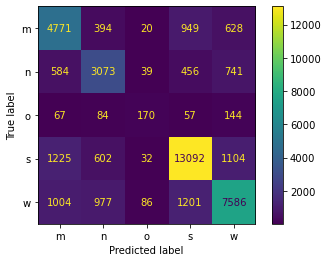

In [483]:
plot_confusion_matrix(knn, X_test, y_test)

In [484]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 11)}, cv = 5)
grid.fit(X_train, y_train)

best_n_neighbors = grid.best_estimator_.n_neighbors

print('Optimal neighbor count: ', best_n_neighbors)

Optimal neighbor count:  1


In [485]:
knn = KNeighborsClassifier()

knn.set_params(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print('Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train, y_train_pred)))
print('Accuracy score on test  data: {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))

Accuracy score on train data: 98.99%
Accuracy score on test  data: 76.74%


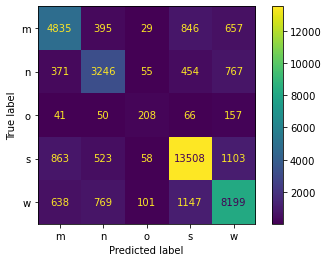

In [486]:
plot_confusion_matrix(knn, X_test, y_test)

In [487]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [488]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print('Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train, y_train_pred)))
print('Accuracy score on test  data: {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))

Accuracy score on train data: 99.16%
Accuracy score on test  data: 79.10%


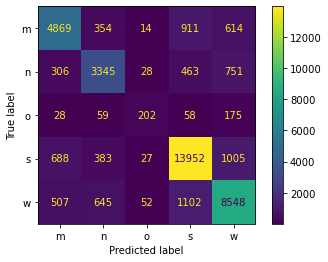

In [489]:
plot_confusion_matrix(rf, X_test, y_test)

In [490]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

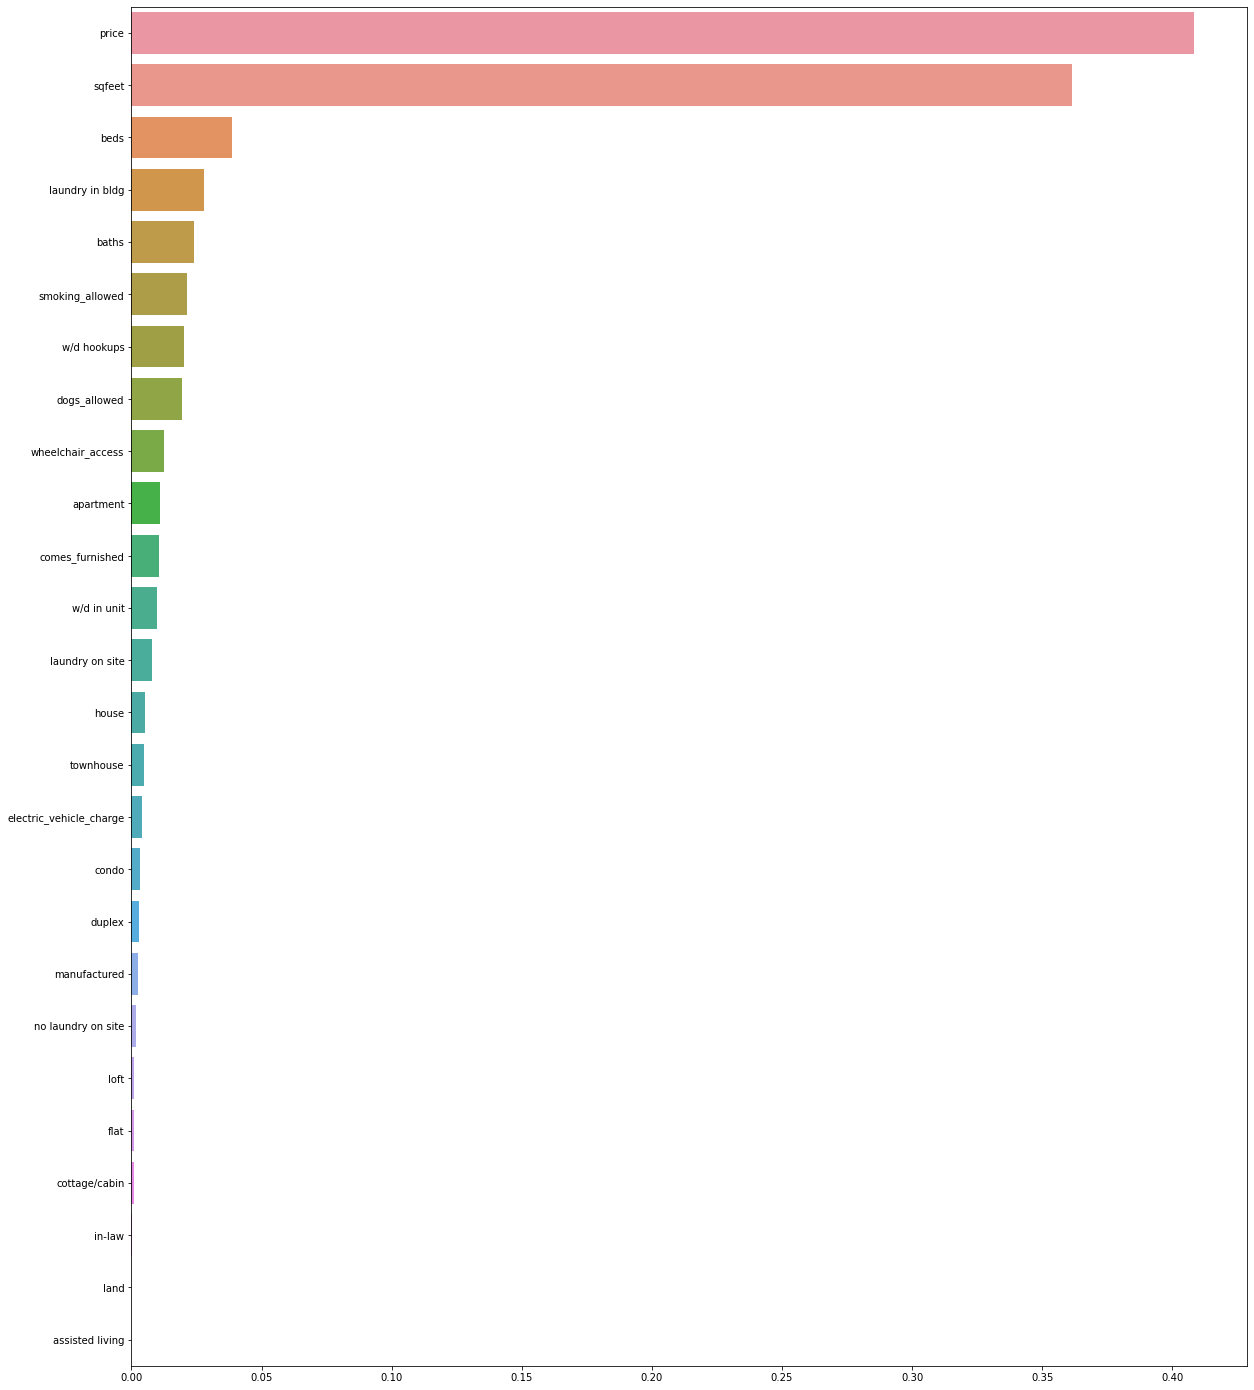

In [491]:
fig = plt.figure(figsize=(20, 25))
sns.barplot(y=importances.index, x=importances, orient='h')
pass

In [94]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [95]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print('Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train, y_train_pred)))
print('Accuracy score on test  data: {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))


Accuracy score on train data: 54.81%
Accuracy score on test  data: 54.95%


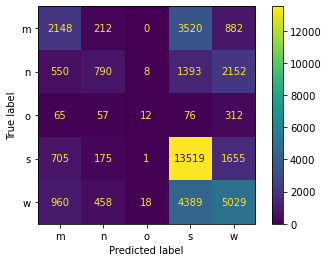

In [ ]:
plot_confusion_matrix(lr, X_test, y_test)

### Домашнее задание # 6

In [62]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [63]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'adam', 
                          activation = 'relu',
                          random_state = 42,
                          max_iter=2000)

In [64]:
%%time
mlp_model.fit(X_train, y_train,)

Wall time: 1min 43s


MLPClassifier(max_iter=2000, random_state=42)

In [65]:
y_train_prediction = mlp_model.predict(X_train)
y_test_prediction = mlp_model.predict(X_test)

In [66]:
accuracy_score(y_train, y_train_prediction)
accuracy_score(y_test, y_test_prediction)
print('[Accuracy]\n')
print('Train: {}, Test: {}'.format(
    sklearn.metrics.accuracy_score(y_train, y_train_prediction),
    sklearn.metrics.accuracy_score(y_test, y_test_prediction)
))

[Accuracy]

Train: 0.6128374284178095, Test: 0.6037943571099391


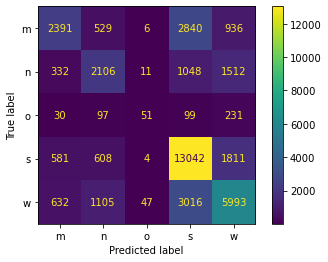

In [67]:
predictions = mlp_model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot()
plt.show()

### Обучение классификатора с двумя скрытыми слоями

In [80]:
model = MLPClassifier(
    hidden_layer_sizes=(10, 20),
    solver='adam',
    activation='relu',
    random_state=44,
    max_iter=1000
)

In [81]:
%%time
model.fit(X_train, y_train)

Wall time: 1min 28s


MLPClassifier(hidden_layer_sizes=(10, 20), max_iter=1000, random_state=44)

In [83]:
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)
accuracy_score(y_train, y_train_prediction)
accuracy_score(y_test, y_test_prediction)
print('[Accuracy]\n')
print('Train: {}, Test: {}'.format(
    sklearn.metrics.accuracy_score(y_train, y_train_prediction),
    sklearn.metrics.accuracy_score(y_test, y_test_prediction)
))

[Accuracy]

Train: 0.5801848548727095, Test: 0.5783962312458395


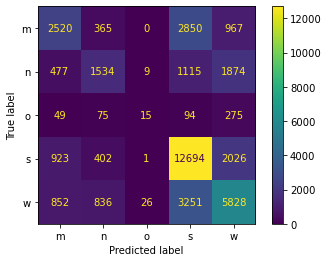

In [85]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

#### Подбор параметра `alpha`

In [68]:
%%time
alpha_arr = np.logspace(-5, 3, 15)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'adam', activation = 'relu', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

Wall time: 13min 39s


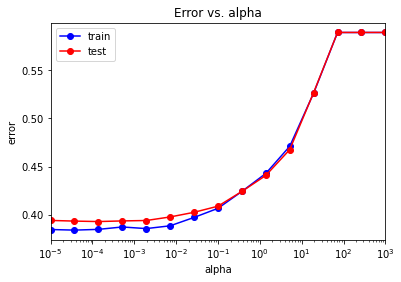

In [69]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

При увеличении `alpha` уменьшается точность модели. Значительного переобучения не наблюдается. Недообучение возникает при больших `alpha`

In [71]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.3841328633729614 0.39300527420758874


### Оптимальное значение `alpha`

In [72]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.00013895]


#### Подбор числа нейронов

In [73]:
%%time
neuron_count_array = np.linspace(10, 200, 10).astype(int)
test_error = []
train_error = []

for neuron_count in neuron_count_array:
    model = MLPClassifier(
        alpha=alpha_opt[0],
        hidden_layer_sizes=(neuron_count,),
        solver='adam',
        activation ='relu',
        max_iter=1000,
        random_state = 42
    )
    model.fit(X_train, y_train)

    y_train_prediction = model.predict(X_train)
    y_test_prediction = model.predict(X_test)

    test_error.append(np.mean(y_test != y_test_prediction))
    train_error.append(np.mean(y_train != y_train_prediction)) 

Wall time: 17min 34s


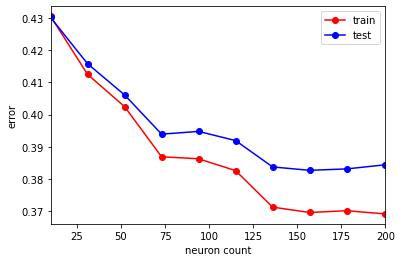

In [74]:
plt.plot(neuron_count_array, train_error, 'r-o', label='train')
plt.plot(neuron_count_array, test_error, 'b-o', label='test')
plt.xlim([np.min(neuron_count_array), np.max(neuron_count_array)])
plt.xlabel('neuron count')
plt.ylabel('error')
plt.legend()

Наблюдается небольшое переобучение при числе нейронов больше 180

In [75]:
min_train_err = np.min(train_error)
min_test_err = np.min(test_error)
print(min_train_err, min_test_err)

0.3691976820598602 0.38271288852475804


In [76]:
min_test_error = np.min(test_error)
neuron_count_opt = neuron_count_array[test_error == min_test_error][0]
print('Optimal neuron count: {}'.format(neuron_count_opt)) 

Optimal neuron count: 157


#### Повторим обучение при оптимальном параметре `alpha` и числе нейронов

In [86]:
mlp_model = MLPClassifier(hidden_layer_sizes = (neuron_count_opt,),
                          solver = 'adam', 
                          activation = 'relu',
                          random_state = 42,
                          max_iter=2000,
                          alpha=alpha_opt[0])

In [87]:
%%time
mlp_model.fit(X_train, y_train,)

Wall time: 2min 45s


MLPClassifier(alpha=0.00013894954943731373, hidden_layer_sizes=(157,),
              max_iter=2000, random_state=42)

In [91]:
y_train_prediction = mlp_model.predict(X_train)
y_test_prediction = mlp_model.predict(X_test)
accuracy_score(y_train, y_train_prediction)
accuracy_score(y_test, y_test_prediction)
print('[Accuracy]\n')
print('Train: {}, Test: {}'.format(
    sklearn.metrics.accuracy_score(y_train, y_train_prediction),
    sklearn.metrics.accuracy_score(y_test, y_test_prediction)
))

[Accuracy]

Train: 0.6303585296954076, Test: 0.617287111475242


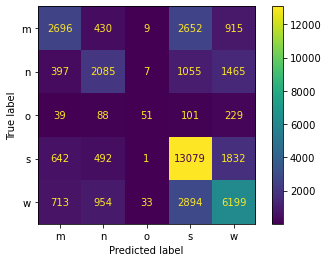

In [92]:
predictions = mlp_model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

### Выводы
* При больших значениях параметра регуляризации `alpha` наблюдается недообучение
* Подбор оптимального числа нейронов повысил точность на тестовой выборке;